# 고유분해와 특이값 분해

정방 행렬 $A$에 대해 다음 식을 만족하는 단위 벡터 $v$, 스칼라 $\lambda$을 여러 개 찾을 수 있다.

$$ Av = \lambda v $$


* $ A \in \mathbf{R}^{M \times M} $

* $ \lambda \in \mathbf{R} $

* $ v \in \mathbf{R}^{M} $


이러한 실수 $\lambda$를 고유값(eigenvalue), 단위 벡터 $v$ 를 고유벡터(eigenvector) 라고 하며 고유값과 고유벡터를 찾는 작업을 고유분해(eigen-decomposition)라고 한다.


$ A \in \mathbf{R}^{M \times M} $ 에 대해 최대 $M$개의 고유값-고유벡터 쌍이 존재할 수 있다.

예를 들어 다음 행렬 $A$

$$
A=
\begin{bmatrix}
1 & -2 \\
2 & -3
\end{bmatrix}
$$
에 대해 다음 단위 벡터와 스칼라 값은 고유벡터-고유값이 된다.

$$\lambda = -1$$

$$
v=
\begin{bmatrix}
\dfrac{1}{\sqrt{2}}  \\
\dfrac{1}{\sqrt{2}}
\end{bmatrix}
$$

복수 개의 고유 벡터가 존재하는 경우에는 다음과 같이 고유벡터 행렬 $V$와 고유값 행렬 $\Lambda$로 표기할 수 있다.


$$ 
A \left[ v_1 \cdots v_M \right] =
\left[ \lambda_1 v_1 \cdots \lambda_M v_M \right] =
\left[ v_1 \cdots v_M \right] 
\begin{bmatrix}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{M} \\
\end{bmatrix}
$$

$$ AV = V\Lambda $$


여기에서 

$$
V = \left[ v_1 \cdots v_M \right]
$$

$$
\Lambda =
\begin{bmatrix}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{M} \\
\end{bmatrix}
$$

numpy linalg 서브패키지에서는 고유값과 고유벡터를 구할 수 있는 `eig` 명령을 제공한다.

In [4]:
w, V = np.linalg.eig(np.array([[1, -2], [2, -3]]))

In [5]:
w

array([-0.99999998, -1.00000002])

In [6]:
V

array([[ 0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

## 대칭 행렬의 고유 분해

행렬 $A$가 대칭(symmetric) 행렬이면 고유값 벡터 행렬 $V$는 다음과 같이 전치 행렬이 역행렬과 같아진다.

$$ V^T V = V V^T = I$$

이 때는 고유 분해가 다음과 같이 표시된다.


$$ A = V\Lambda V^T = \sum_{i=1}^{M} {\lambda_i} v_i v_i^T$$

$$ A^{-1} = V \Lambda^{-1} V^T = \sum_{i=1}^{M} \dfrac{1}{\lambda_i} v_i v_i^T$$

## 확률 변수의 좌표 변환

확률 변수의 공분산 행렬 $\Sigma$ 은 대칭 행렬이므로 위의 관계식이 성립한다. 

따라서 다변수 가우시안 정규 분포의 확률 밀도 함수는 다음과 같이 표시할 수 있다.

$$
\begin{eqnarray}
\mathcal{N}(x \mid \mu, \Sigma) 
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T V \Lambda^{-1} V^T (x-\mu) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (V^T(x-\mu))^T  \Lambda^{-1} (V^T (x-\mu)) \right) \\
\end{eqnarray}
$$

즉 변환 행렬 $V^T$로 좌표 변환하면 서로 독립인 성분들로 나누어진다.

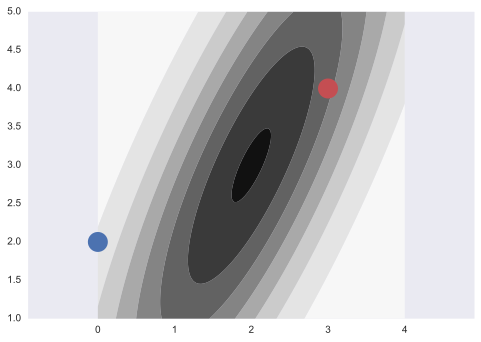

In [51]:
mu = [2, 3]
cov = [[2, 3],[3, 7]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))

x1 = np.array([0, 2])
x1_mu = x1 - mu
x2 = np.array([3, 4])
x2_mu = x2 - mu
plt.plot(x1_mu[0] + mu[0], x1_mu[1] + mu[1], 'bo', ms=20)
plt.plot(x2_mu[0] + mu[0], x2_mu[1] + mu[1], 'ro', ms=20)

plt.axis("equal")
plt.show()

In [44]:
w, V = np.linalg.eig(cov)

In [45]:
w

array([ 0.59487516,  8.40512484])

In [46]:
V

array([[-0.90558942, -0.4241554 ],
       [ 0.4241554 , -0.90558942]])

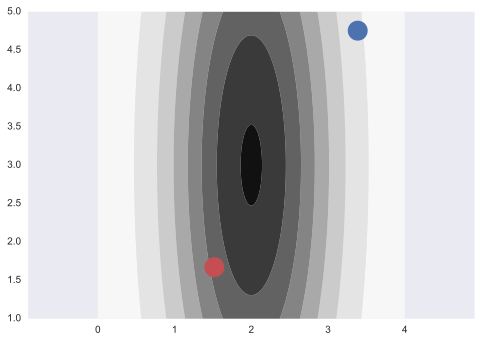

In [53]:
rv = sp.stats.multivariate_normal(mu, w)
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)
plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))

x1 = np.array([0, 2])
x1_mu = x1 - mu
x2 = np.array([3, 4])
x2_mu = x2 - mu

x1t_mu = V.T.dot(x1_mu)  # 좌표 변환
x2t_mu = V.T.dot(x2_mu)  # 좌표 변환

plt.plot(x1t_mu[0] + mu[0], x1t_mu[1] + mu[1], 'bo', ms=20)
plt.plot(x2t_mu[0] + mu[0], x2t_mu[1] + mu[1], 'ro', ms=20)

plt.axis("equal")
plt.show()

## 특이값 분해

정방 행렬이 아닌 행렬 $M$에 대해서도 고유 분해와 유사한 분해가 가능하다. 이를 특이값 분해(singular value decomposition)이라고 한다.


* $M \in \mathbf{R}^{m \times n}$ 

$$M = U \Sigma V^T$$ 

여기에서 
* $U \in \mathbf{R}^{m \times m}$ 
* $\Sigma  \in \mathbf{R}^{m \times n}$  
* $V \in \mathbf{R}^{n \times n}$ 

이고 행렬 $U$와 $V$는 다음 관계를 만족한다.

$$ U^T U = UU^T = I $$
$$ V^T V = VV^T = I $$

예를 들어

$$\mathbf{M} = \begin{bmatrix}
                      1 & 0 & 0 & 0 & 2 \\
                      0 & 0 & 3 & 0 & 0 \\
                      0 & 0 & 0 & 0 & 0 \\
                      0 & 2 & 0 & 0 & 0
                    \end{bmatrix}
$$
에 대한 특이값 분해 결과는 다음과 같다.

$$
\begin{align}
\mathbf{U} &= \begin{bmatrix}
               0 & 0 & 1 &  0 \\
               1 & 0 & 0 &  0 \\
               0 & 0 & 0 & -1 \\
               0 & 1 & 0 &  0 \\
             \end{bmatrix} \\
\boldsymbol{\Sigma} &= \begin{bmatrix}
                        \sqrt{5} & 0 & 0 & 0 & 0 \\
                        0 & 2 & 0 & 0 & 0 \\
                        0 & 0 & 1 & 0 & 0 \\
                        0 & 0 & 0 & 0 & 0
                      \end{bmatrix} \\
\mathbf{V}^T &= \begin{bmatrix}
                           0 & 0 & \sqrt{0.2} & 0 & \sqrt{0.8} \\
                           0 & 1 & 0 & 0 & 0 \\
                           1 & 0 & 0 & 0 & 0 \\
                           0 & 0 & -\sqrt{0.8} & 0 & \sqrt{0.2} \\
                           0 & 0 & 0 & 1 & 0 \\
               \end{bmatrix}
\end{align}$$

이는 다음과 같이 확인 할 수 있다.

$$\begin{align}
\mathbf{U} \mathbf{U^T} &=
   \begin{bmatrix}
               0 & 0 & 1 &  0 \\
               1 & 0 & 0 &  0 \\
               0 & 0 & 0 & -1 \\
               0 & 1 & 0 &  0 \\
             \end{bmatrix}
\cdot
  \begin{bmatrix}
               0 & 1 & 0 & 0 \\
               0 & 0 & 0 & 1 \\
               1 & 0 & 0 & 0 \\
               0 & 0 & -1 & 0 \\
             \end{bmatrix}
   = 
  \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
  \end{bmatrix} 
   = \mathbf{I}_4 \\
\mathbf{V} \mathbf{V^T} &=
  \begin{bmatrix}
                           0 & 0 & \sqrt{0.2} & 0 & \sqrt{0.8} \\
                           0 & 1 & 0 & 0 & 0 \\
                           1 & 0 & 0 & 0 & 0 \\
                           0 & 0 & -\sqrt{0.8} & 0 & \sqrt{0.2} \\
                           0 & 0 & 0 & 1 & 0 \\
               \end{bmatrix}
  \cdot
  \begin{bmatrix}
              0 & 0 & 1 & 0 &          0 \\
              0 & 1 & 0 & 0 &          0 \\
     \sqrt{0.2} & 0 & 0 & -\sqrt{0.8} & 0\\
              0 & 0 & 0 & 0 &          1 \\
     \sqrt{0.8} & 0 & 0 & \sqrt{0.2} & 0 \\
  \end{bmatrix} 
  =
  \begin{bmatrix}
    1 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 0 & 1
  \end{bmatrix} 
   = \mathbf{I}_5
\end{align}$$


In [42]:
from pprint import pprint
M = np.array([[1,0,0,0,0],[0,0,2,0,3],[0,0,0,0,0],[0,2,0,0,0]])
print("\nM:"); pprint(M)
U, S0, V0 = np.linalg.svd(M, full_matrices=True)
print("\nU:"); pprint(U)
S = np.hstack([np.diag(S0), np.zeros(M.shape[0])[:, np.newaxis]])
print("\nS:"); pprint(S)
print("\nV:"); pprint(V)
V = V0.T
print("\nU.dot(U.T):"); pprint(U.dot(U.T))
print("\nV.dot(V.T):"); pprint(V.dot(V.T))
print("\nU.dot(S).dot(V.T):"); pprint(U.dot(S).dot(V.T))


M:
array([[1, 0, 0, 0, 0],
       [0, 0, 2, 0, 3],
       [0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0]])

U:
array([[ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  1.,  0.,  0.]])

S:
array([[ 3.60555128,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

V:
array([[-0.        , -0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.5547002 ,  0.        ,  0.        , -0.83205029,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.83205029,  0.        ,  0.        ,  0.5547002 ,  0.        ]])

U.dot(U.T):
array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
  